In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import scipy.io

In [ ]:
fun= np.genfromtxt("/content/drive/MyDrive/myphycnn/fun.txt")
fun.shape

(100000,)

In [ ]:
res=np.genfromtxt("/content/drive/MyDrive/myphycnn/res.txt")
res.shape

(100001, 2)

In [ ]:
x=fun
y=res[0:100000,1]

In [ ]:
y

array([0.     , 0.03879, 0.03953, ..., 0.06839, 0.1044 , 0.07643])

In [ ]:
from sklearn.model_selection import train_test_split
x_data=x.reshape(1000,100,1)
y_data=y.reshape(1000,100,1)
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.98,random_state=25)
#x_train=x_train[0:1000,:,:]
#y_train=y_train[0:1000,:,:]
#x_train.shape

In [3]:
dataDir = "/content/drive/MyDrive/phy/"
mat = scipy.io.loadmat(dataDir + 'data_SanBernardino.mat')

x_train = mat['input_tf'][:, 3000:3200]
x_train=x_train.reshape(15,200,1)
x_test=mat['input_pred_tf'][:, 3000:3200]
x_test=x_test.reshape(6,200,1)
  
y_train = mat['target_tf'][:,3000:3200,:]
y_train=y_train.reshape(15,200,2)
y_test=mat['target_pred_tf'][:,3000:3200]
y_test=y_test.reshape(6,200,2)

In [4]:
model=keras.Sequential([keras.layers.Conv1D(64,40,strides=1,padding='same',input_shape=(200,1),activation='relu'),
                        keras.layers.Conv1D(64,40,strides=1,padding='same',activation='relu'),
                        keras.layers.Conv1D(64,40,strides=1,padding='same',activation='relu'),
                        keras.layers.Conv1D(64,40,strides=1,padding='same',activation='relu'),
                        keras.layers.Conv1D(64,40,strides=1,padding='same',activation='relu'),
                        keras.layers.Conv1D(64,40,strides=1,padding='same',activation='relu'),
                        keras.layers.Dense(50,activation='relu'),
                        
                        keras.layers.Dense(50,activation='relu'),
                        
                        keras.layers.Dense(2)])


model.compile(loss='mean_squared_error',optimizer='Adam',metrics='mse',
               )

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 200, 64)           2624      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 200, 64)           163904    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 200, 64)           163904    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 200, 64)           163904    
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 200, 64)           163904    
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 200, 64)           163904    
_________________________________________________________________
dense (Dense)                (None, 200, 50)           3

In [5]:
model.fit(x_train,y_train,epochs=2000)

Epoch 1/2000
1/1 [==============================] - 32s 32s/step - loss: 0.0017 - mse: 0.0017
Epoch 2/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.0017 - mse: 0.0017
Epoch 3/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0016 - mse: 0.0016
Epoch 4/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.0012 - mse: 0.0012
Epoch 5/2000
1/1 [==============================] - 0s 9ms/step - loss: 9.8585e-04 - mse: 9.8585e-04
Epoch 6/2000
1/1 [==============================] - 0s 10ms/step - loss: 6.6960e-04 - mse: 6.6960e-04
Epoch 7/2000
1/1 [==============================] - 0s 9ms/step - loss: 6.3563e-04 - mse: 6.3563e-04
Epoch 8/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0016 - mse: 0.0016
Epoch 9/2000
1/1 [==============================] - 0s 9ms/step - loss: 6.1130e-04 - mse: 6.1130e-04
Epoch 10/2000
1/1 [==============================] - 0s 9ms/step - loss: 8.3132e-04 - mse: 8.3132e-04
Epoch 11/2000
1/1 [======

In [6]:
t=model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 354ms/step - loss: 3.1219e-05 - mse: 3.1219e-05


In [8]:
te=model.predict(x_test)

In [9]:
import matplotlib.pyplot as plt


In [10]:
def plott(x):
  plt.figure()
  plt.plot(y_test[x,:,1])
  plt.plot(te[x,:,1])
  

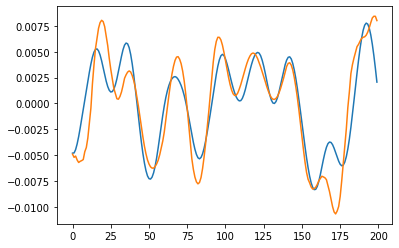

In [18]:
plott(0)

In [16]:
dt = 0.02
    # finite difference
n = y_train.shape[1]
phi1 = np.concatenate([np.array([-3/ 2, 2, -1 / 2]), np.zeros([n - 3, ])])
temp1 = np.concatenate([-1 / 2 * np.identity(n - 2), np.zeros([n - 2, 2])], axis=1)
temp2 = np.concatenate([np.zeros([n - 2, 2]), 1 / 2 * np.identity(n - 2)], axis=1)
phi2 = temp1 + temp2
phi3 = np.concatenate([np.zeros([n - 3, ]), np.array([1 / 2, -2, 3 / 2])])
Phi_t = 1 / dt * np.concatenate(
            [np.reshape(phi1, [1, phi1.shape[0]]), phi2, np.reshape(phi3, [1, phi3.shape[0]])], axis=0)
N_train = y_train.shape[0]

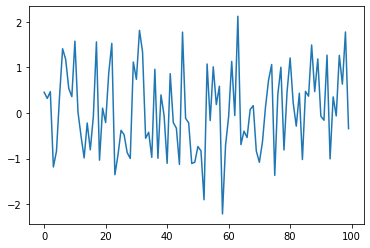